In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from pandas_datareader import data as wb
import yfinance as yf

/tmp/ipykernel_766/1662011929.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# yfinance irá substituir as funções do pandas-datareader que estão com bugs
# funções que funcionam corretamente
yf.pdr_override()

In [3]:
tickers = ['BTC-USD', 'HUT', 'RIOT', 'ADA-USD']
start = '2020-3-1'
end = '2024-2-12'
tickers = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
tickers = tickers.dropna()
tickers


/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[**********************75%%**********            ]  3 of 4 completed/var/data/python/lib/python3.11/site-packages/yfinance/utils.py

Ticker,ADA-USD,BTC-USD,HUT,RIOT
Date,,,,
2020-03-02,0.048953,8869.669922,4.700,1.180
2020-03-03,0.048761,8787.786133,4.495,1.140
2020-03-04,0.049004,8755.246094,4.450,1.165
2020-03-05,0.051057,9078.762695,5.150,1.280
2020-03-06,0.051448,9122.545898,4.350,1.270
...,...,...,...,...
2024-02-05,0.493340,42658.667969,6.880,10.340
2024-02-06,0.498463,43084.671875,6.880,10.810
2024-02-07,0.501773,44318.222656,6.770,11.320


<function matplotlib.pyplot.show(close=None, block=None)>

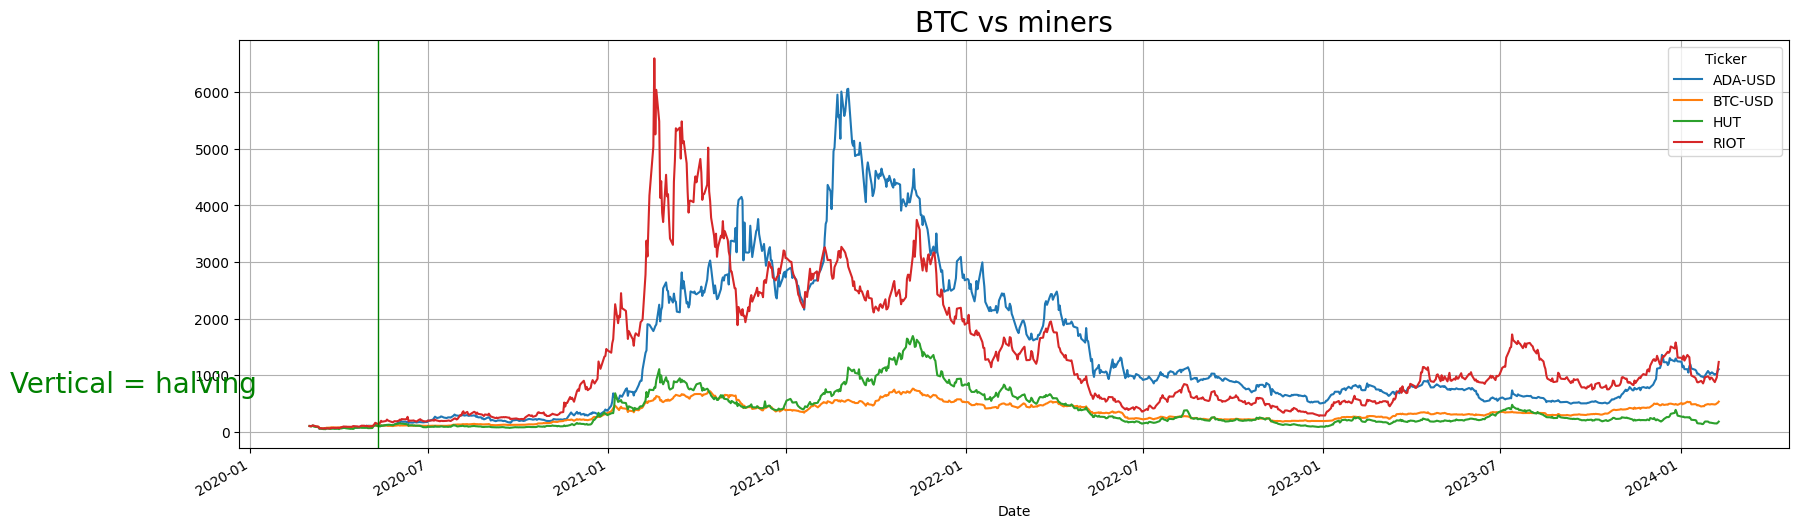

In [4]:
#normalizar para comparar
tickers.iloc[0]
(tickers/tickers.iloc[0] * 100).plot(figsize = (20,6));

# adicionar linhas verticais nas datas dos halvings
# using a pandas timestamp:
plt.axvline(pd.Timestamp("2020-05-11"), color='g', lw=1)
plt.text(18017, 700, 'Vertical = halving', size=20, color='g')
plt.title('BTC vs miners', fontsize=20)
#plt.plot('BTC-USD', linestyle='dotted')
plt.grid(True)
plt.show